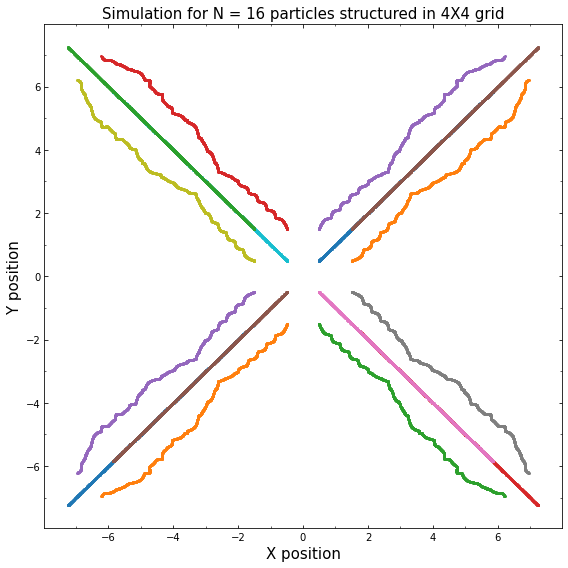

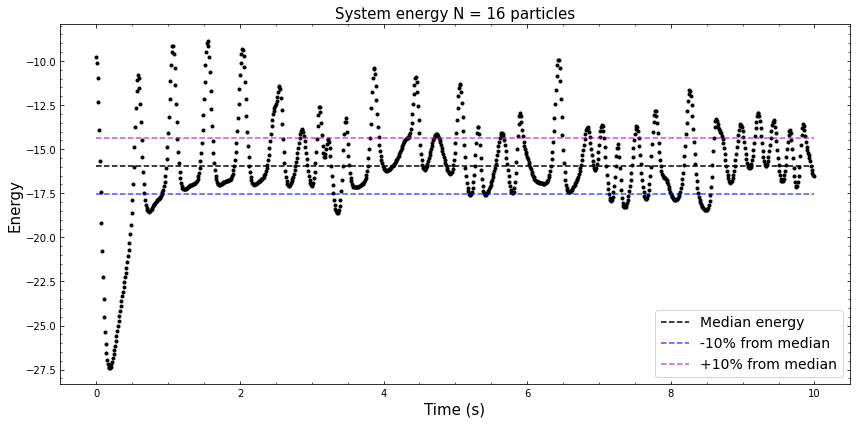

In [12]:
# Pseudocode:
# Import libraries
# Set N number of particles to be simulated, the distances between each particle
# Set the initial positions of all particles at vertices of 4X4 grid, COM located at (0,0)
# Set the initial velocity as zero for all particles to 0
# Define timestep dt = 0.01, and create time array
# Modify the Verlet method for multibody in a function 
# Plot the simulation on xy-plane of the grid
# Plot the energy as a function of time from each particle

# The modified Verlet function:
#   Initialize the physical constants
#   Initialize x,y positions, full-step vx,vy, half-step vx,vy as 2D numpy array, with N particles on row axis
#   and time t on column axis
#   Initialize the kinetic and potential energy as an array
#   Compute the first iteration of the half-step velocity components at dt/2
#   for each particle
#   Compute the energy at t = 0
#   Start a time for-loop from 1 to len(t):
#       Compute the the positions from prev. half-step velocity for all particles
#       Calculate acceleration and potential energy ith particle from j particles
#       Compute k vector from this acceleration
#       Compute full-step velocity from this k vector
#       Compute half-step velocity from this k vector
#       Calculate kinetic energy using the current full-step velocity
#   Sum kinetic and potential energies
#   Return positions and velocities in x,y components, time, and energies


import numpy as np
import matplotlib.pyplot as plt
from MyFunctions import Verlet_multibody
from matplotlib.ticker import MultipleLocator, AutoMinorLocator

# Number of particles
N = 16

# Set initial conditions for all particles
Lx = 4.0
Ly = 4.0

dx = Lx/np.sqrt(N)
dy = Ly/np.sqrt(N)

x_grid = np.arange(dx/2, Lx, dx)
y_grid = np.arange(dy/2, Ly, dy)

xx_grid, yy_grid = np.meshgrid(x_grid, y_grid)

x_initial = xx_grid.flatten() - Lx/2
y_initial = yy_grid.flatten() - Ly/2


# Set initial velocities of all N particles to zero
vx_initial = np.zeros(N)
vy_initial = np.zeros(N)

# Define time step and generate time array
dt = 0.01
T = 1000*dt
t = np.arange(0,T,dt)

# Group initial conditions into 2D array
r_i = np.array([x_initial, y_initial])
v_i = np.array([vx_initial, vy_initial])


x_tot_t, y_tot_t, vx_tot_t, vy_tot_t, vxhalf_tot_t, vyhalf_tot_t, U_t, T_t = Verlet_multibody(t,dt,r_i,v_i,N)

# Calculate total energy of the system
E_t = U_t + T_t

# Plotting mechanics
tdir = 'in'
plt.rcParams['xtick.direction'] = tdir
plt.rcParams['ytick.direction'] = tdir
text = 15
legendfont = 14

# Plotting
fig,ax0 = plt.subplots(figsize=(8,8),ncols=1,nrows=1)
for i in range(N):
    ax0.plot(x_tot_t[i,:],y_tot_t[i,:],'.',markersize=4)
ax0.set_title("Simulation for N = 16 particles structured in 4X4 grid",fontsize=text)
ax0.set_xlabel("X position",fontsize=text)
ax0.set_ylabel("Y position",fontsize=text)
ax0.xaxis.set_minor_locator(MultipleLocator(1))
ax0.yaxis.set_minor_locator(MultipleLocator(1))
ax0.yaxis.set_ticks_position('both') 
ax0.xaxis.set_ticks_position('both')

plt.tight_layout()
plt.savefig("Q2a.pdf")
plt.show()

# Plot energy, median of energy and the 10% interval from median
avg_E = np.median(E_t)

fig,ax0 = plt.subplots(figsize=(12,6),ncols=1,nrows=1)
ax0.plot(t,E_t, 'k.')
ax0.plot(t, np.ones(len(t))*avg_E, 'k--',label='Median energy', markersize=5)
ax0.plot(t, np.ones(len(t))*avg_E + 0.1*avg_E, 'b--',alpha=0.7,label='-10% from median', markersize=5)
ax0.plot(t, np.ones(len(t))*avg_E - 0.1*avg_E, 'm--',alpha=0.7,label='+10% from median', markersize=5)
ax0.set_xlabel('Time (s)',fontsize=text)
ax0.set_ylabel('Energy',fontsize=text)
ax0.set_title('System energy N = 16 particles', fontsize=text)
ax0.xaxis.set_minor_locator(MultipleLocator(0.5))
ax0.yaxis.set_minor_locator(MultipleLocator(0.5))
ax0.yaxis.set_ticks_position('both') 
ax0.xaxis.set_ticks_position('both')
ax0.legend(fontsize=legendfont)

plt.tight_layout()
plt.savefig("Q2b.pdf")
plt.show() 